In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testnn/WhatsApp Image 2024-07-21 at 23.31.55_97b15339.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_665_SP_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_476_HF_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_638_SP_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_121_DA_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_175_DA_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_843_BR_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_594_VF_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_343.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_290_HF_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_838_BR_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_577_DA_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_369_RO_.jpg
/kaggle/input/brain-

In [63]:
import keras
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
import io
from PIL import Image
import tqdm
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt

Train_Test_Split

In [64]:
x_train=[]
y_train=[]
labels={1:'yes',0:'no'}
for i in labels:
    path=os.path.join('../input/brain-tumor-dataset/brain_tumor_dataset',labels[i])
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j))
        img=cv2.resize(img,(150,150))
#         img=img_to_array(img)
        x_train.append(img)
        y_train.append(i)
        

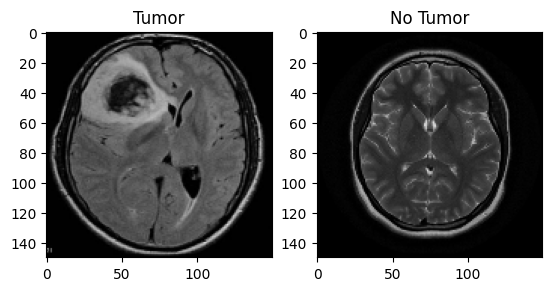

<Figure size 640x480 with 0 Axes>

In [65]:
plt.subplot(121)
plt.title('Tumor' if y_train[7]==1 else 'No Tumor')
plt.imshow(x_train[7])
plt.subplot(122)
plt.title('Tumor' if y_train[178]==1 else 'No Tumor')
plt.imshow(x_train[178])
plt.show()
plt.tight_layout()


In [66]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
print(len(x_train))
print(y_train.shape)

253
(253,)


In [67]:
x_train,y_train=shuffle(x_train,y_train)

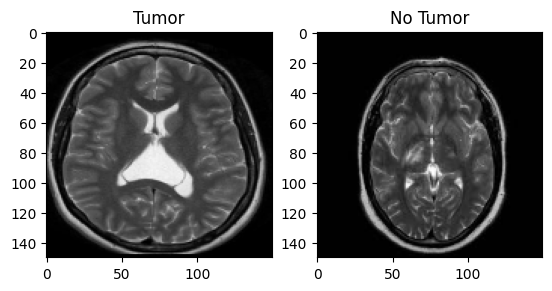

<Figure size 640x480 with 0 Axes>

In [68]:
plt.subplot(121)
plt.title('Tumor' if y_train[25]==1 else 'No Tumor')
plt.imshow(x_train[25])
plt.subplot(122)
plt.title('Tumor' if y_train[69]==1 else 'No Tumor')
plt.imshow(x_train[69])
plt.show()
plt.tight_layout()

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=20)

In [70]:
print(len(y_train))
print(len(x_train))

202
202


In [71]:
x_train = x_train / 255.0
x_test = x_test / 255.0
# history = model.fit(x_train,y_train,epochs=50)

Convolutional Neural Network

In [72]:
# model=Sequential()
# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation='sigmoid'))


# EfficientNetB4
# keras.applications.EfficientNetB4(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
   
# )


keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)



574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


<Functional name=vgg19, built=True>

In [73]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    37,880,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,710,213 (437.58 MB)

 Trainable params: 38,236,737 (145.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,473,476 (291.72 MB)

None


In [74]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(x_train,y_train,epochs=25,validation_split=0.1)
# history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
#                     epochs=50,
#                     validation_data=(x_test, y_test),
#                     callbacks=[early_stopping])

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 992ms/step - accuracy: 0.9672 - loss: 0.1650 - val_accuracy: 0.6190 - val_loss: 17.2307
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9422 - loss: 0.3520 - val_accuracy: 0.9048 - val_loss: 0.2907
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9873 - loss: 0.1651 - val_accuracy: 0.6190 - val_loss: 1.3637
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9524 - val_loss: 0.3115
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9928 - loss: 0.0142 - val_accuracy: 0.9048 - val_loss: 0.1301
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9524 - val_loss: 0.0763
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9975 - loss: 0.0267 - val_accuracy: 0.8571 - val_loss: 0.6181
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9975 - loss: 0.0063 - val_accuracy: 0.8571 - val_loss: 0.20

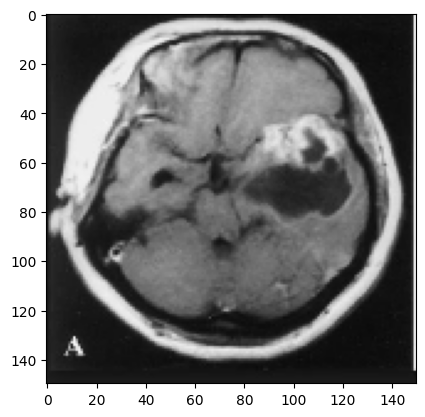

In [78]:
img=cv2.imread('/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/yes/Y112.JPG')
img=cv2.resize(img,(150,150))
img=np.array(img)

# print(img.shape)
plt.imshow(img)
plt.show()
img=img.reshape(1,150,150,3)


In [82]:
print('Tumor' if model.predict(img)==1 else 'No tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Tumor
